<a href="https://colab.research.google.com/github/vadhri/distibuted-optimization/blob/main/core_methods/least_squares_2nd_order_optmization_sine_cos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import math

import matplotlib.pyplot as plt

In [2]:
# calcuate gradient
def local_gradient(X, theta, lr):
  grad = np.dot(X.T, (np.dot(X, theta) - y))
  return theta - lr * grad


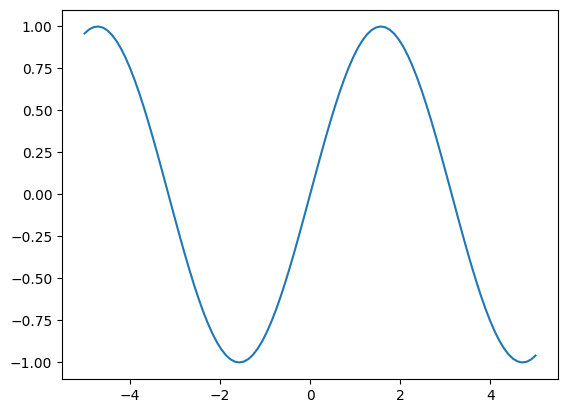

In [3]:
x = np.linspace(-5, 5, 100)
y = np.sin(x)

plt.plot(x, y)
plt.show()

def taylor_design_matrix(x, degrees=[10]):
    return np.stack([x**k / math.factorial(k) for k in degrees], axis=1)

# initialize parameters as many as degrees
theta = np.random.rand(10)

X_vectorized = taylor_design_matrix(x)

In [4]:
def newton_fit(x, y, degrees, max_iter=10000, tol=1e-10):
    X = taylor_design_matrix(x, degrees)
    n = len(x)
    theta = np.zeros(len(degrees))

    for i in range(max_iter):
        preds = X @ theta
        grad = (1/n) * X.T @ (preds - y)
        hess = (1/n) * X.T @ X
        delta = np.linalg.solve(hess, grad)
        theta -= delta
        if np.linalg.norm(delta) < tol:
            print(f"Converged at iteration {i}")
            break

    return theta, X @ theta


Converged at iteration 58
Converged at iteration 56


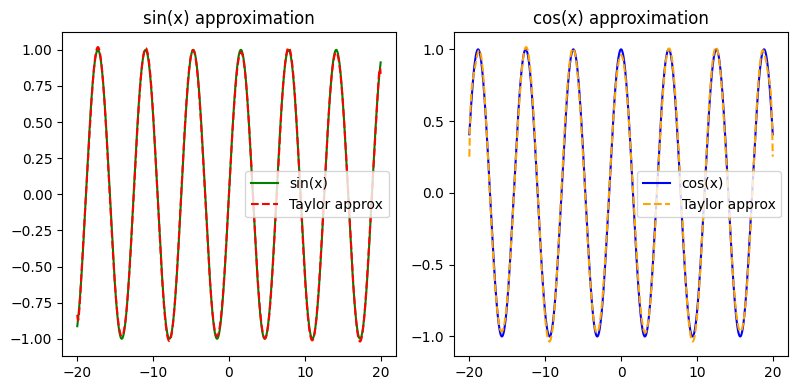

In [5]:
import matplotlib.pyplot as plt

x = np.linspace(-20, 20, 400000)

# Sine
degrees = list(range(24))
theta_sin, y_sin_pred = newton_fit(x, np.sin(x), degrees)

# Cosine
theta_cos, y_cos_pred = newton_fit(x, np.cos(x), degrees)

# Plot
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.plot(x, np.sin(x), label='sin(x)', color='green')
plt.plot(x, y_sin_pred, '--', label='Taylor approx', color='red')
plt.title("sin(x) approximation")
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(x, np.cos(x), label='cos(x)', color='blue')
plt.plot(x, y_cos_pred, '--', label='Taylor approx', color='orange')
plt.title("cos(x) approximation")
plt.legend()

plt.tight_layout()
plt.show()
